In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
q1=pd.read_csv('Company_Data.csv')

In [5]:
q1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
q1['Urban']=q1['Urban'].astype('category')

In [8]:
q1['US']=q1['US'].astype('category')

In [21]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int64   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(2), float64(1), int64(8)
memory usage: 29.3 KB


In [20]:
q1['ShelveLoc']=q1['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [22]:
model_data=pd.get_dummies(q1)
model_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,3,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,3,38,13,0,1,1,0


In [23]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_No     400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
 11  US_No        400 non-null    uint8  
 12  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(8), uint8(4)
memory usage: 29.8 KB


In [24]:
x=model_data.iloc[:,1:]
y=model_data['ShelveLoc']

In [25]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,3,42,17,0,1,0,1
1,111,48,16,260,83,1,65,10,0,1,0,1
2,113,35,10,269,80,2,59,12,0,1,0,1
3,117,100,4,466,97,2,55,14,0,1,0,1
4,141,64,3,340,128,3,38,13,0,1,1,0


In [26]:
y.head()

0    3
1    1
2    2
3    2
4    3
Name: ShelveLoc, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape,y_train.shape

((320, 12), (320,))

In [29]:
x_test.shape,y_test.shape

((80, 12), (80,))

In [30]:
model=DecisionTreeClassifier(max_depth=6,criterion='entropy',max_leaf_nodes=8)

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=8)

In [32]:
train_predict=model.predict(x_train)

In [33]:
confusion_matrix(y_train,train_predict)

array([[ 68,   0,   0],
       [  0, 178,   0],
       [  0,   0,  74]], dtype=int64)

In [34]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00        74

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [35]:
features=x.columns.values
features

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No',
       'US_Yes'], dtype=object)

In [38]:
classes=['0','1','2']

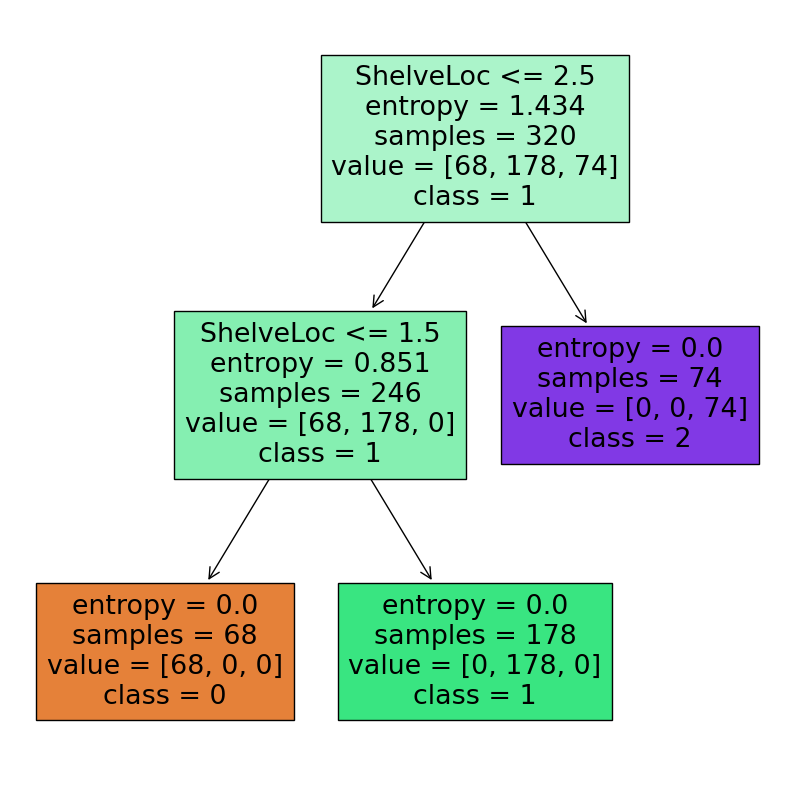

In [40]:
fig,axes=plt.subplots(figsize=(10,10))
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

# Question 2

In [41]:
q2=pd.read_csv('Fraud_check.csv')

In [42]:
q2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [47]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Taxable.Income          600 non-null    int64   
 1   City.Population         600 non-null    int64   
 2   Work.Experience         600 non-null    int64   
 3   Undergrad_YES           600 non-null    uint8   
 4   Marital.Status_Married  600 non-null    uint8   
 5   Marital.Status_Single   600 non-null    uint8   
 6   Urban_YES               600 non-null    uint8   
 7   TaxInc                  600 non-null    category
dtypes: category(1), int64(3), uint8(4)
memory usage: 17.2 KB


In [43]:
q2=pd.get_dummies(q2,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [44]:
q2.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [45]:
q2["TaxInc"] = pd.cut(q2["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [46]:
q2.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [48]:
q2 = pd.get_dummies(q2,columns = ["TaxInc"],drop_first=True)

In [51]:
q2.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [52]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [53]:
# Normalized data frame (considering the numerical part of data)
q2_norm = norm_func(q2.iloc[:,1:])
q2_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [62]:
q2.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"work"})

,population,work,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [76]:
array = q2.values
X = array[:,0:3]
y = array[:,3]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [78]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
#Find the accuracy
model.score(X_test,y_test)

-0.8931902985074629